# LOAN_DATASET

# Prediction of Loan Status Using Logistic Regression Model



# Introduction

We were tasked to analyse the loan data set. The model should predict whether a loan would be approved or not. We have 8 features in total out of which 7 are independent variables and 1 dependent variable. 

The model should predict whether a loan should be given or not, we decided to use the Logistic Regression Model since is a classification algorithm to predict binary outcome with Loan Status as the response and Gender, Married, Dependents, Education, CoapplicantIncome, Credit_History , Property_Area as the features. 

Our work is structured as follows :

1. Data cleaning
2. Data set Exploration
3. Data visualization
4. Model Building (Logistic Regression)
5. Confusion Matrix and Accuracy
6. Prediction




The model was implemented with the important libraries

# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Dataset Exploration

# 1. Reading the Dataset

In [2]:
loan = pd.read_csv("loan_dataset.csv", index_col = 0)
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [3]:
loan.shape

(614, 12)

# 2. Statistical Summary of the dataset

In [4]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 3. Finding the sum of missing values in the data set

In [5]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan.isnull().sum().sum()

149

In [7]:
loan1=loan.sample(10, random_state=0)
loan1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002453,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban,Y
LP001164,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,N
LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y
LP002505,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,N
LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,Y
LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449.0,165.0,180.0,0.0,Rural,N
LP002740,Male,Yes,3+,Graduate,No,6417,0.0,157.0,180.0,1.0,Rural,Y
LP002386,Male,No,0,Graduate,NaN,12876,0.0,405.0,360.0,1.0,Semiurban,Y
LP002188,Male,No,0,Graduate,No,5124,0.0,124.0,NaN,0.0,Rural,N


In [8]:
loan=loan.dropna()
# loan2.shape

In [9]:
loan2=loan.dropna()
loan2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [10]:
loan2.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization

We used the bivariate analysis in finding some kind of empirical relationship between two variables. Specifically the dependent variable (Loan_Status) and the independent variables (Gender, Married, Dependents, Education, CoapplicantIncome, Credit_History , Property_Area as the features).

<AxesSubplot:xlabel='Gender', ylabel='count'>

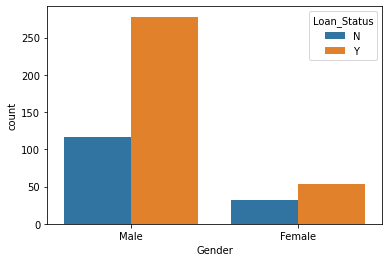

In [11]:
sns.countplot(data=loan, x='Gender', hue='Loan_Status')


There is no substancial difference between male and female approval.

<AxesSubplot:xlabel='Married', ylabel='count'>

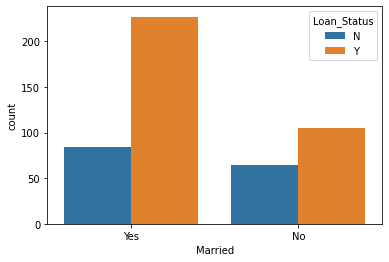

In [12]:
sns.countplot(data=loan, x='Married', hue='Loan_Status')



Married applicants have a slightly higher chances of loan approval.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

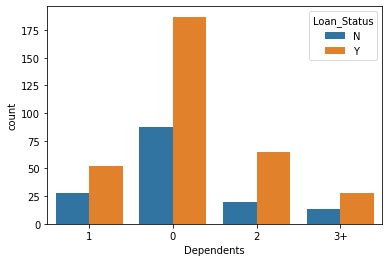

In [13]:
sns.countplot(data=loan, x='Dependents', hue='Loan_Status')


Applicant with not dependents has high chance of approval.

<AxesSubplot:xlabel='Education', ylabel='count'>

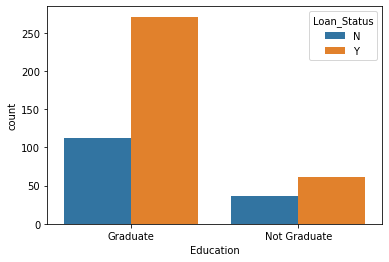

In [14]:
sns.countplot(data=loan, x='Education', hue='Loan_Status')


Graduate has high chance of loan approval compared to non-graduates.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

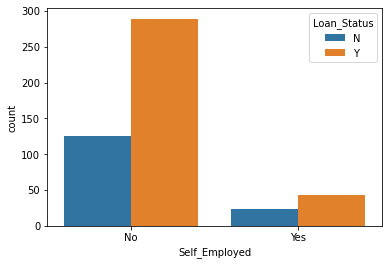

In [15]:
sns.countplot(data=loan, x='Self_Employed', hue='Loan_Status')


Self Employees have slight chance of loan approval.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

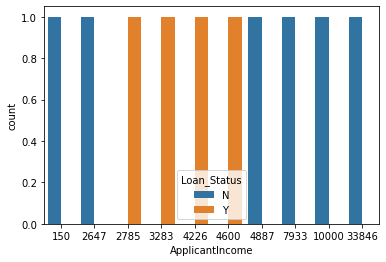

In [16]:
sns.countplot(data=loan.sample(10, random_state=0), x='ApplicantIncome', hue='Loan_Status')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='count'>

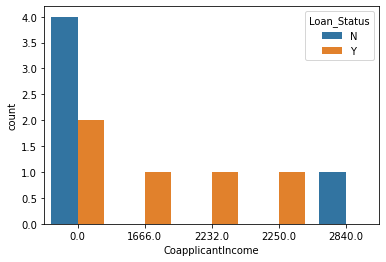

In [17]:
sns.countplot(data=loan.sample(10), x='CoapplicantIncome', hue='Loan_Status')

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

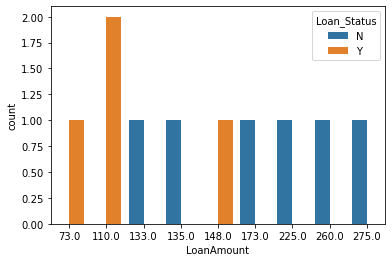

In [18]:
sns.countplot(data=loan.sample(10, random_state=0), x='LoanAmount', hue='Loan_Status')


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

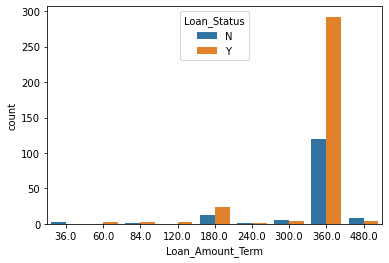

In [19]:
sns.countplot(data=loan, x='Loan_Amount_Term', hue='Loan_Status')


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

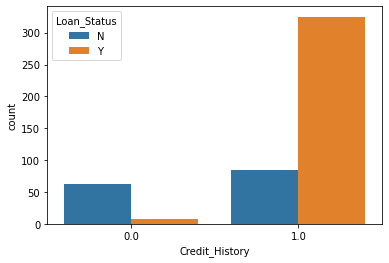

In [20]:
sns.countplot(data=loan, x='Credit_History', hue='Loan_Status')


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

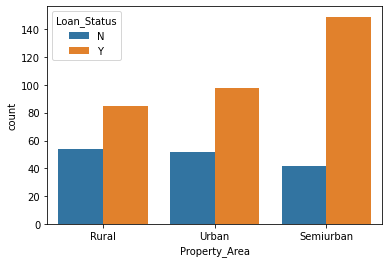

In [21]:
sns.countplot(data=loan, x='Property_Area', hue='Loan_Status')


# Conventing Categorical Variables to Numerical

We convented the categorical data to numerical because logistic regression works only numerical values as input.


In [22]:
loan.replace({'Gender': {'Male': 1,'Female':0},'Married':{'No':0,'Yes':1}, 'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'No':0,'Yes':1}, 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Dependents':{'1':1, '0':0, '2':2, '3':3, '3+':4}, 'Loan_Status' : {'Y':1, 'N':0} })

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1


# Visualizing Features Correlation via Heatmap

The variables with darker color means their correlation is more.

<AxesSubplot:>

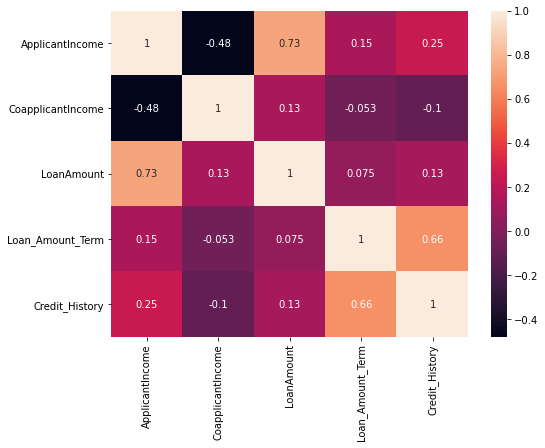

In [23]:
plt.figure(figsize =(8,6))
sns.heatmap(loan1.corr(),annot=True)

In [24]:
loan1=loan.replace({'Gender': {'Male': 1,'Female':0},'Married':{'No':0,'Yes':1}, 'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'No':0,'Yes':1}, 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Dependents':{'1':1, '0':0, '2':2, '3':3, '3+':4} })
loan1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,Y
LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,Y


# Prediction of Loan Status Using Logistics Regression

We decided to use logistic regression because our response variable is a categorical variable. linear regression is not appropriate for our data set since our response is qualitative.


Defining features and the response

In [25]:
X=loan1[["Gender","Married","Dependents","Education","CoapplicantIncome","Credit_History","Property_Area"]].values
y=loan1["Loan_Status"].values


Splitting the feature and response set

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


# Logistic Regression

Training and Testing the model

In [27]:
log_reg = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

Predicting probabilities 

In [28]:
probs_y=log_reg.predict_proba(X_test) 
probs_y = np.round(probs_y, 2)
result = pd.DataFrame(probs_y, columns= np.unique(loan1.Loan_Status))
predictedt_index = [np.argmax(result.iloc[i,:]) for i in range(result.shape[0])]
predicted_Status =[np.unique(loan1.Loan_Status)[i] for i in predictedt_index]
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=predicted_Status)
result.sample(20)

,Test,Predicted,N,Y
72,Y,Y,0.12,0.88
6,Y,Y,0.16,0.84
83,N,N,0.66,0.34
67,Y,Y,0.15,0.85
30,Y,Y,0.18,0.82
51,N,Y,0.15,0.85
103,N,Y,0.15,0.85
17,Y,Y,0.18,0.82
85,N,Y,0.14,0.86
5,N,Y,0.17,0.83


Computing the confusion matrix 

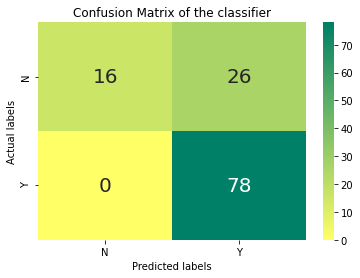

In [29]:
con_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(loan1.Loan_Status),
           yticklabels=np.unique(loan1.Loan_Status))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

The accuracy of the model is 78%

In [30]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7833333333333333


In [31]:
log_reg.coef_

array([[-4.82693262e-01,  3.19078092e-01,  2.15233986e-01,
        -2.25854107e-01, -6.79665108e-05,  2.74063044e+00,
        -3.06936804e-02]])

We predicted the model with the following assumptions:

Gender : Female,Married : Yes , Dependents : 1, Education : graduate, CoapplicantIncome : 1508, Credit_History : Yes, Property_Area : Semiurban.

In [32]:
X_testn = [[0,1,1,1,1508.0,1,1]]
y_pred = log_reg.predict(X_testn)
y_pred

array(['Y'], dtype=object)